<h2> Análise Exploratória de Dados </h2>

Objetivo: Criação de um modelo preditivo de churn para uma empresa operadora de telefonia utilizando dados históricos de clientes ...

Importação de pacotes e bibliotecas

In [2]:
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

Definição de funções


In [3]:
def gerar_histograma(dados,variavel_alvo,titulo,xlabel_titulo,ylabel_titulo,rotate_axis_x = False,bins_number_flag = False,bins_number = 0):
    fig = plt.figure(figsize=(10, 5))
    if (bins_number_flag == False):
        plt.hist(dados[variavel_alvo], edgecolor='black') 
    else:
        plt.hist(dados[variavel_alvo], edgecolor='black',bins= bins_number) 
    plt.title(titulo)
    plt.xlabel(xlabel_titulo)
    plt.ylabel(ylabel_titulo)
    if(rotate_axis_x):
        plt.xticks(rotation=90)

In [4]:
def gerar_boxplot(dados,variavel_alvo,titulo,xlabel_titulo,ylabel_titulo):
    plt.boxplot(dados[variavel_alvo])
    plt.title(titulo)
    plt.xlabel(xlabel_titulo)
    plt.ylabel(ylabel_titulo)

In [5]:
def gerar_piechart(sizes,labels_txt,titulo):
    plt.pie(sizes, labels=labels_txt, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.show()

In [6]:
def gerar_barchart(categorias,valores,titulo,xlabel_titulo,ylabel_titulo):
    plt.bar(categorias, valores, color='skyblue', edgecolor='black')
    plt.title(titulo)
    plt.xlabel(xlabel_titulo)
    plt.ylabel(ylabel_titulo)
    plt.show()

In [7]:
def converter_meses_ano(mes):
    return mes//12.008

Chamadas Principais

Carregamento das bases de dados

In [8]:
# Obtenção das bases de dados
try:
    clientes_contratos = pd.read_csv("../../bases/churn-80.csv")
except Exception as excecao:
    print(f"Erro ao carregar as bases de dados!")
    print(excecao)
else:
    print(f"Base de dados lidas com sucesso!")

Base de dados lidas com sucesso!


Exploração Geral

In [9]:
clientes_contratos.shape

(2666, 20)

In [10]:
print(f"Qtde de colunas {len(clientes_contratos.columns)}")
print(f"Colunas: {clientes_contratos.columns}")

Qtde de colunas 20
Colunas: Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [11]:
clientes_contratos.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Verificação de existência de valores nulos?

In [12]:
clientes_contratos.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Note que não há valores nulos ou ausentes em nenhuma coluna.

Target (churn) </br>
Variável qualitativa nominal.

In [13]:
clientes_contratos['Churn'].head(6)

0    False
1    False
2    False
3    False
4    False
5    False
Name: Churn, dtype: bool

In [14]:
print(f"Qtde de registros únicos {clientes_contratos['Churn'].nunique()}")
print(f"Registros únicos {clientes_contratos['Churn'].unique()}")

Qtde de registros únicos 2
Registros únicos [False  True]


In [15]:
clientes_contratos['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

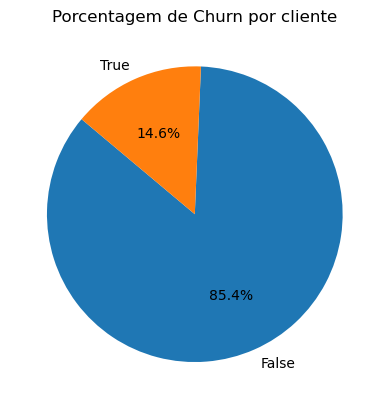

In [16]:
gerar_piechart(clientes_contratos['Churn'].value_counts(),
               clientes_contratos['Churn'].value_counts().index,
               'Porcentagem de Churn por cliente')

In [17]:
clientes_contratos['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

Note que 85% não cancelou o contrato, enquanto o restante sim.

State </br>
Representa o estado do cliente. Variável qualitativa.

In [18]:
clientes_contratos['State']

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
2661    SC
2662    AZ
2663    WV
2664    RI
2665    TN
Name: State, Length: 2666, dtype: object

In [19]:
print(f"Qtde de registros únicos {clientes_contratos['State'].nunique()}")
print(f"Rregistros únicos {clientes_contratos['State'].unique()}")

Qtde de registros únicos 51
Rregistros únicos ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


In [20]:
# Quais são os estados mais presentes dos clientes?
# WV    88 West Virginia
# MN    70 Minnesota
# NY    68 New York
# CA    24 Califórnia
clientes_contratos['State'].value_counts()

State
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: count, dtype: int64

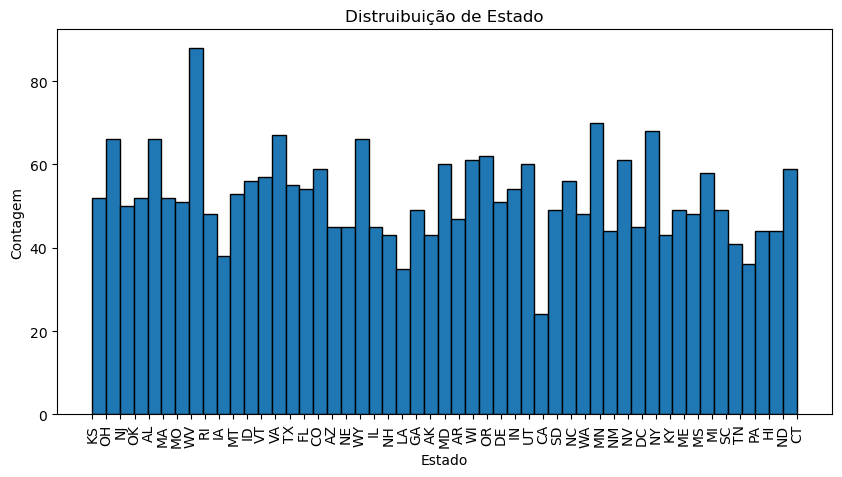

In [21]:
gerar_histograma(clientes_contratos,'State','Distruibuição de Estado','Estado','Contagem',True,True,clientes_contratos['State'].nunique())

Account length </br>
Quantitativa. Comprimento da conta ou talvez tempo da conta em dias ou em meses. Variável quantitativa.

In [22]:
clientes_contratos['Account length'].head(5)

0    128
1    107
2    137
3     84
4     75
Name: Account length, dtype: int64

Em médias, os clientes possuem 100 meses, ou seja, um pouco acima de 8 anos. </br>
O cliente mais antigo tem 20 anos, enquanto o mais novo, tem 1 mês. 

In [23]:
clientes_contratos['Account length'].describe()

count    2666.000000
mean      100.620405
std        39.563974
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: Account length, dtype: float64

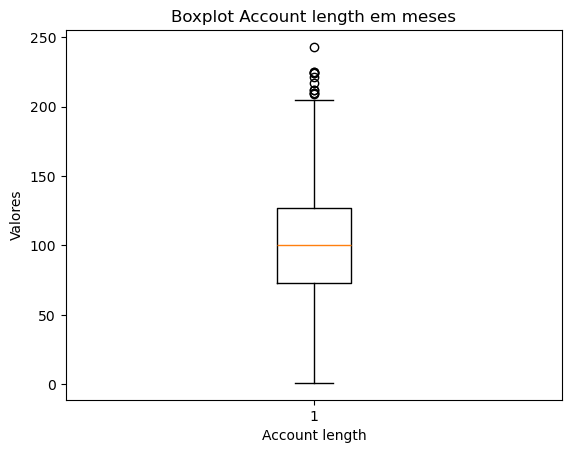

In [24]:
gerar_boxplot(clientes_contratos,'Account length','Boxplot Account length em meses','Account length','Valores')
    

In [25]:
# Criando variável:Account length year para fins de observação
clientes_contratos['Account_length_year'] = clientes_contratos['Account length'].apply(converter_meses_ano)
clientes_contratos[['Account length','Account_length_year']].head(5)

,Account length,Account_length_year
0,128,10.0
1,107,8.0
2,137,11.0
3,84,6.0
4,75,6.0


In [26]:
# Em média, os clientes possuem 7 anos.
clientes_contratos['Account_length_year'].describe()

count    2666.000000
mean        7.851463
std         3.312559
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        20.000000
Name: Account_length_year, dtype: float64

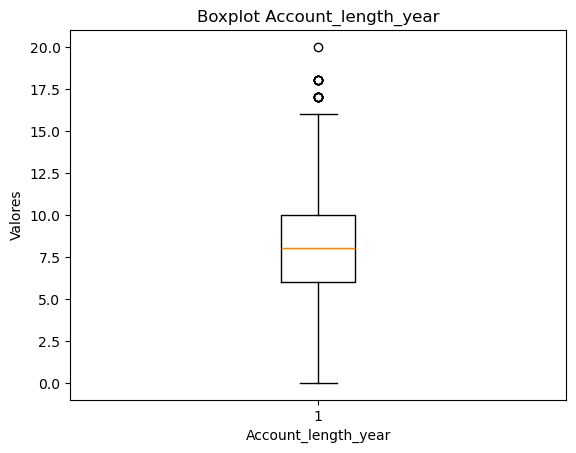

In [27]:
gerar_boxplot(clientes_contratos,'Account_length_year','Boxplot Account_length_year','Account_length_year','Valores')

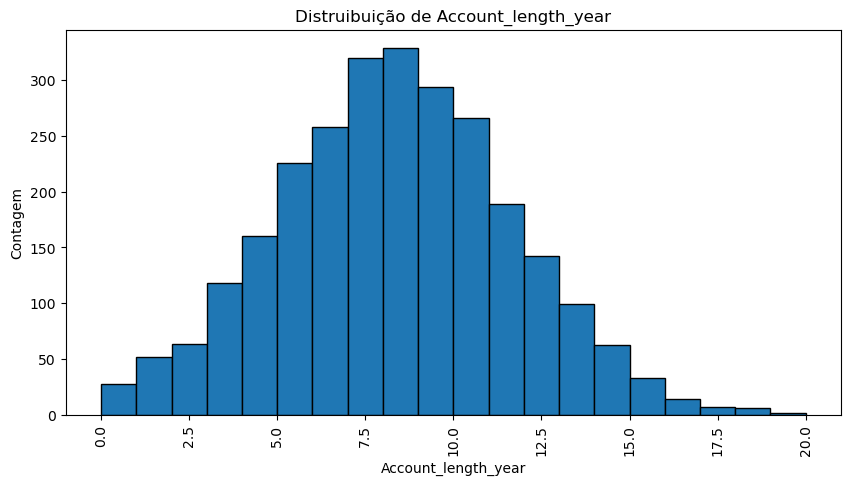

In [28]:
gerar_histograma(clientes_contratos,'Account_length_year','Distruibuição de Account_length_year','Account_length_year','Contagem',True,True,clientes_contratos['Account_length_year'].nunique())

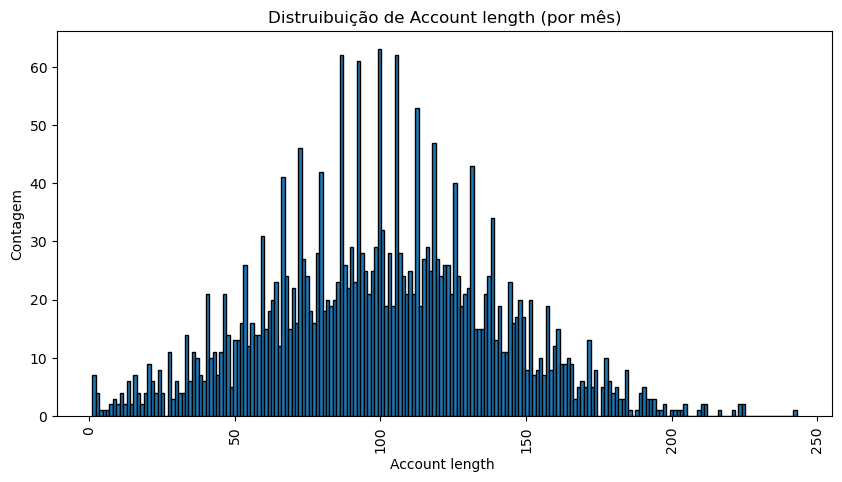

In [29]:
gerar_histograma(clientes_contratos,'Account length','Distruibuição de Account length (por mês)','Account length ','Contagem',True,True,clientes_contratos['Account length'].nunique())

Area code </br>
Código da área. Variável qualitativa (categórica)

In [30]:
print(f"Qtde de registros únicos {clientes_contratos['Area code'].nunique()}")
print(f"Registros únicos {clientes_contratos['Area code'].unique()}")

Qtde de registros únicos 3
Registros únicos [415 408 510]


In [31]:
# Quais são as áreas de código mais e menos presentes?
clientes_contratos['Area code'].value_counts()

Area code
415    1318
510     679
408     669
Name: count, dtype: int64

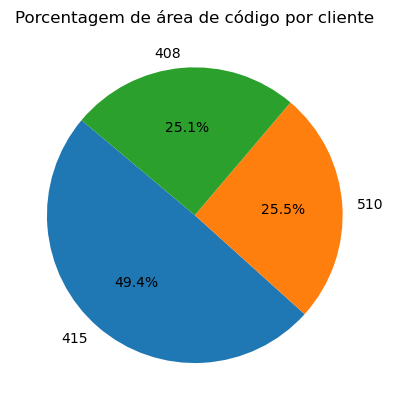

In [32]:
gerar_piechart(clientes_contratos['Area code'].value_counts(),clientes_contratos['Area code'].value_counts().index,'Porcentagem de área de código por cliente')

International plan </br>
Se tem plano internacional ou não. Variável qualitativa.

In [33]:
clientes_contratos['International plan'].head(5)

0     No
1     No
2     No
3    Yes
4    Yes
Name: International plan, dtype: object

In [34]:
print(f"Qtde de registros únicos {clientes_contratos['International plan'].nunique()}")
print(f"Registros únicos {clientes_contratos['International plan'].unique()}")

Qtde de registros únicos 2
Registros únicos ['No' 'Yes']


In [35]:
clientes_contratos['International plan'].value_counts()

International plan
No     2396
Yes     270
Name: count, dtype: int64

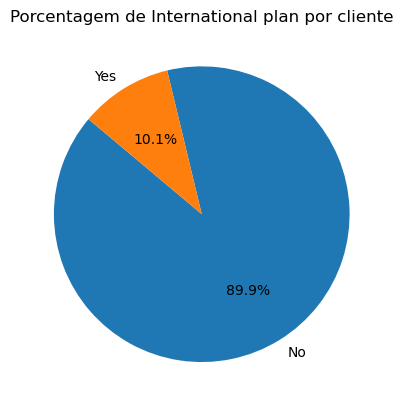

In [36]:
gerar_piechart(clientes_contratos['International plan'].value_counts(),clientes_contratos['International plan'].value_counts().index,'Porcentagem de International plan por cliente')

89% dos clientes não possuem plano internacional, enquanto apenas 10% possui.

Voice mail plan (plano de correio de voz) </br>
Variável qualitativa (categórica)

In [37]:
print(f"Qtde de registros únicos {clientes_contratos['Voice mail plan'].nunique()}")
print(f"Registros únicos {clientes_contratos['Voice mail plan'].unique()}")

Qtde de registros únicos 2
Registros únicos ['Yes' 'No']


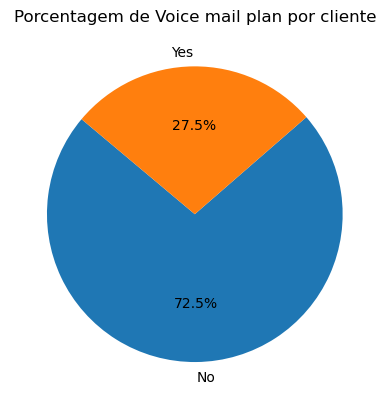

In [38]:
gerar_piechart(clientes_contratos['Voice mail plan'].value_counts(),
               clientes_contratos['Voice mail plan'].value_counts().index,
               'Porcentagem de Voice mail plan por cliente')

72% dos clientes não possuem plano de correio de voz, enquanto apenas 27% possuem.

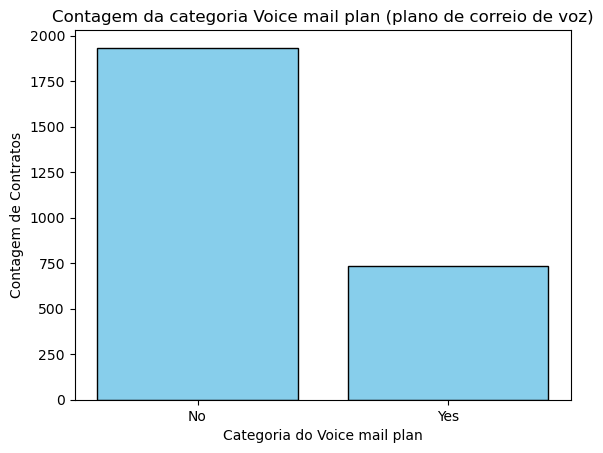

In [39]:
gerar_barchart(clientes_contratos['Voice mail plan'].value_counts().index,
               clientes_contratos['Voice mail plan'].value_counts(),
               'Contagem da categoria Voice mail plan (plano de correio de voz)',
               'Categoria do Voice mail plan','Contagem de Contratos')

Análise multivariada

In [40]:
clientes_contratos.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Account_length_year'],
      dtype='object')

In [41]:
# Dos clientes que DEIXARAM a EMPRESA, quanto em média estava o custo (taxa) das ligações, comparando com os que NÃO DEIXARAM?
# Variáveis: churn e Total intl charge 
clientes_contratos_deixaram_empresa = clientes_contratos[clientes_contratos.Churn == True]
clientes_contratos_nao_deixaram_empresa = clientes_contratos[clientes_contratos.Churn != True]

print(f"Média do total de taxa de ligações dos CLIENTES DESISTENTES {st.mean(clientes_contratos_deixaram_empresa['Total intl charge'])}")
print(f"Média do total de taxa de ligações dos CLIENTES NÃO DESISTENTES {st.mean(clientes_contratos_nao_deixaram_empresa['Total intl charge'])}")
print("==================== -- ==================== -- ==================== ")
print(f"Somatório do total de taxa de ligações dos CLIENTES DESISTENTES {sum(clientes_contratos_deixaram_empresa['Total intl charge'])}")
print(f"Somatório do total de taxa de ligações dos CLIENTES NÃO DESISTENTES {sum(clientes_contratos_nao_deixaram_empresa['Total intl charge'])}")
print("==================== -- ==================== -- ==================== ")
print(f"Máximo do total de taxa de ligações dos CLIENTES DESISTENTES {max(clientes_contratos_deixaram_empresa['Total intl charge'])}")
print(f"Máximo do total de taxa de ligações dos CLIENTES NÃO DESISTENTES {max(clientes_contratos_nao_deixaram_empresa['Total intl charge'])}")

# Note que a taxa dos clientes DESISTENTES, estava sutilmente mais alta. Importante observar que a quantidade dos clientes desistente é bem baixa comparada aos não desistentes.
# Isso pode sutilmente ser importante.

Média do total de taxa de ligações dos CLIENTES DESISTENTES 2.921726804123711
Média do total de taxa de ligações dos CLIENTES NÃO DESISTENTES 2.737708516242318
==================== -- ==================== -- ==================== 
Somatório do total de taxa de ligações dos CLIENTES DESISTENTES 1133.63
Somatório do total de taxa de ligações dos CLIENTES NÃO DESISTENTES 6236.499999999996
==================== -- ==================== -- ==================== 
Máximo do total de taxa de ligações dos CLIENTES DESISTENTES 5.4
Máximo do total de taxa de ligações dos CLIENTES NÃO DESISTENTES 5.1


In [42]:
# Dos clientes que DEIXARAM a EMPRESA, como está a distribuição da contratação do PLANO INTERNACIONAL? E os que NÃO DEIXARAM?
print(f'Total de clientes que DEIXARAM A EMPRESA {len(clientes_contratos_deixaram_empresa)}')
print(clientes_contratos_deixaram_empresa['International plan'].value_counts())
print("==================== -- ==================== -- ==================== ")
print(f'Total de clientes que NÃO DEIXARAM A EMPRESA {len(clientes_contratos_nao_deixaram_empresa)}')
print(clientes_contratos_nao_deixaram_empresa['International plan'].value_counts())

Total de clientes que DEIXARAM A EMPRESA 388
International plan
No     270
Yes    118
Name: count, dtype: int64
==================== -- ==================== -- ==================== 
Total de clientes que NÃO DEIXARAM A EMPRESA 2278
International plan
No     2126
Yes     152
Name: count, dtype: int64


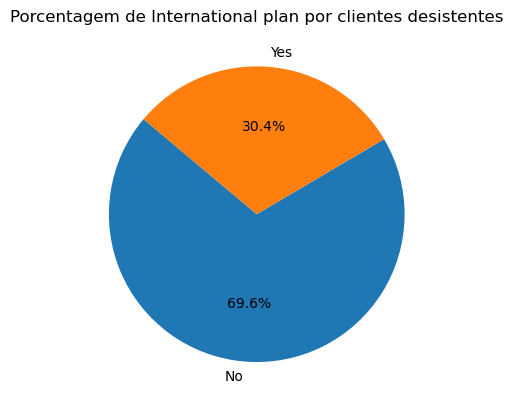

In [43]:
gerar_piechart(clientes_contratos_deixaram_empresa['International plan'].value_counts(),
               clientes_contratos_deixaram_empresa['International plan'].value_counts().index,
               'Porcentagem de International plan por clientes desistentes')

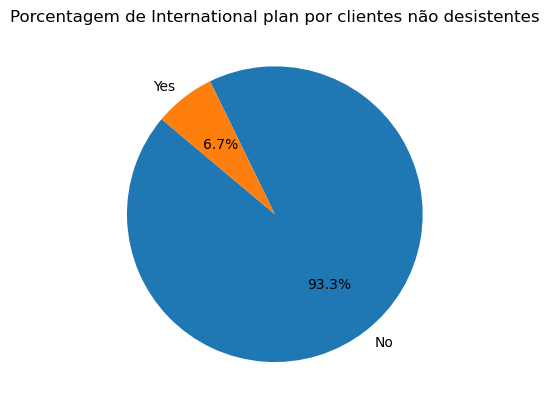

In [44]:
gerar_piechart(clientes_contratos_nao_deixaram_empresa['International plan'].value_counts(),
               clientes_contratos_nao_deixaram_empresa['International plan'].value_counts().index,
               'Porcentagem de International plan por clientes não desistentes')

In [45]:
# Os clientes desistentes, apenas 30% tinha plano internacional.
# Os clientes não desistentes, apenas 6% tinha plano internacional.
# Ou seja, o impacto provavelmente é pequeno.

Number vmail messages  </br>
Variável quantitativa. Número de mensagens vmail que teve naquele período

In [46]:
clientes_contratos['Number vmail messages'].describe()

count    2666.000000
mean        8.021755
std        13.612277
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max        50.000000
Name: Number vmail messages, dtype: float64

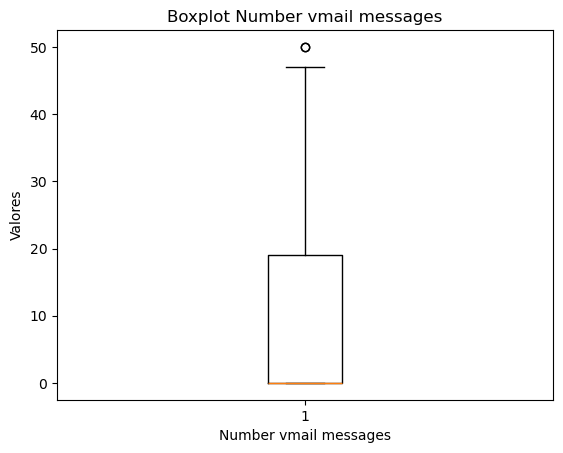

In [47]:
gerar_boxplot(clientes_contratos,'Number vmail messages','Boxplot Number vmail messages','Number vmail messages','Valores')

Em média, os clientes possuiram 8 mensagens vmail. Até o quartil 50% está zerado, ou seja, 'em geral' eles não usam muito esse recurso.

Obs: foram coletadas informações de ligações diários por turno, isto é: matutino, vespertino e noturno. Para cada turno há 3 variáveis agregadas: </br>
1. total de minutos gastos
2. total de ligações efetuadas
3. total do custo associado. 

gggg

Total day minutes </br>
Total de minutos por dia, provavelmente um somatório na construção da ABT. Variável quantitativa.

In [48]:
clientes_contratos['Total day minutes'].head(5)

0    265.1
1    161.6
2    243.4
3    299.4
4    166.7
Name: Total day minutes, dtype: float64

In [49]:
clientes_contratos['Total day minutes'].describe()

count    2666.00000
mean      179.48162
std        54.21035
min         0.00000
25%       143.40000
50%       179.95000
75%       215.90000
max       350.80000
Name: Total day minutes, dtype: float64

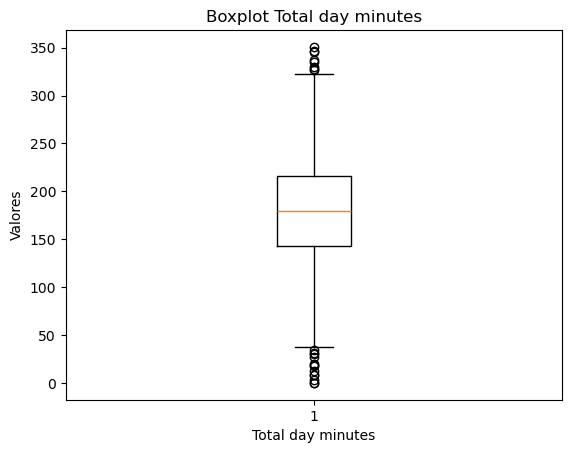

In [50]:
gerar_boxplot(clientes_contratos,'Total day minutes','Boxplot Total day minutes','Total day minutes','Valores')

Em média, os clientes tem 179 minutos por dia. Os valores variam de 0 - 350.

Total day calls </br>
Total de chamadas diárias. Variável quantitativa discreta.

In [51]:
clientes_contratos['Total day calls'].head(6)

0    110
1    123
2    114
3     71
4    113
5     98
Name: Total day calls, dtype: int64

In [52]:
clientes_contratos['Total day calls'].describe()

count    2666.000000
mean      100.310203
std        19.988162
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       160.000000
Name: Total day calls, dtype: float64

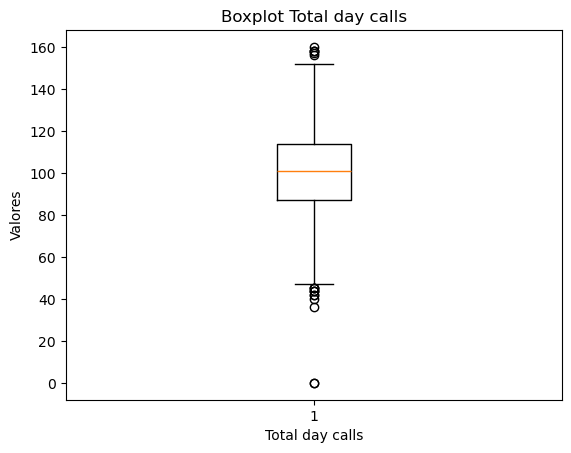

In [53]:
gerar_boxplot(clientes_contratos,'Total day calls','Boxplot Total day calls','Total day calls','Valores')

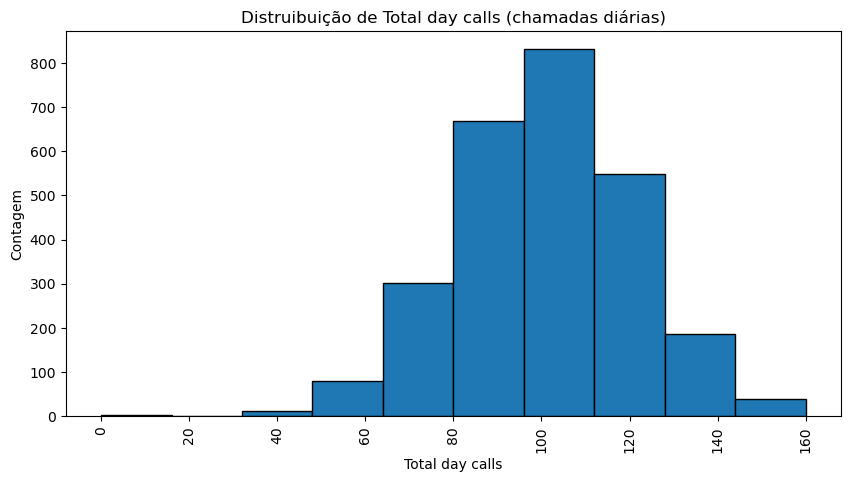

In [54]:
gerar_histograma(clientes_contratos,'Total day calls',
                 'Distruibuição de Total day calls (chamadas diárias)',
                 'Total day calls',
                 'Contagem',True,False)

Em média, os clientes possuem 100 no total de chamadas diárias.

Total day charge </br>
Taxa total do dia. Variável quantitativa discreta.

In [55]:
clientes_contratos['Total day charge'].describe()

count    2666.000000
mean       30.512404
std         9.215733
min         0.000000
25%        24.380000
50%        30.590000
75%        36.700000
max        59.640000
Name: Total day charge, dtype: float64

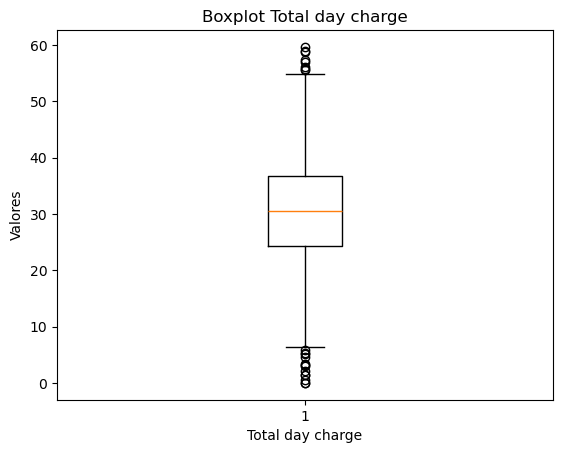

In [56]:
gerar_boxplot(clientes_contratos,'Total day charge','Boxplot Total day charge','Total day charge','Valores')

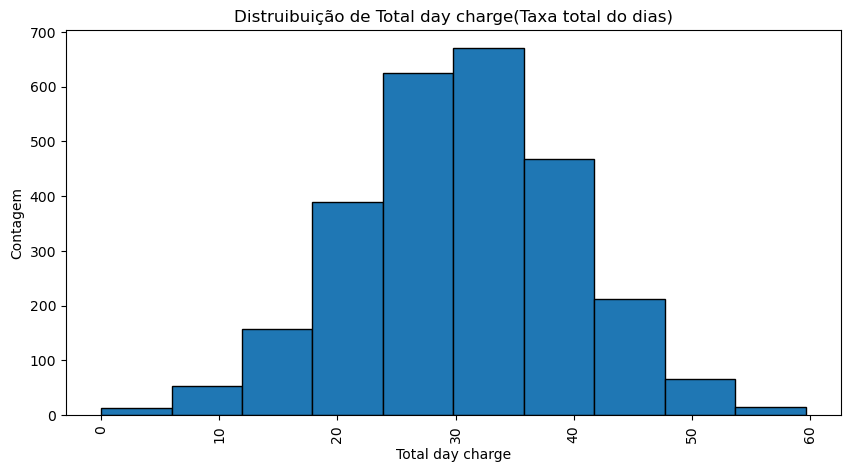

In [57]:
gerar_histograma(clientes_contratos,'Total day charge',
                 'Distruibuição de Total day charge(Taxa total do dias)',
                 'Total day charge',
                 'Contagem',True,False)

Em média, os clientes possuem uma taxa total do dia de 30

Total eve minutes </br>
Número de minutos vespertina. Variável quantitativa contínua.

Em média, os clientes possuem 200 número de minutos por dia considerando as ligações vespertinas.

In [58]:
clientes_contratos['Total eve minutes'].describe()

count    2666.000000
mean      200.386159
std        50.951515
min         0.000000
25%       165.300000
50%       200.900000
75%       235.100000
max       363.700000
Name: Total eve minutes, dtype: float64

In [59]:
clientes_contratos['Total eve minutes'].head(5)

0    197.4
1    195.5
2    121.2
3     61.9
4    148.3
Name: Total eve minutes, dtype: float64

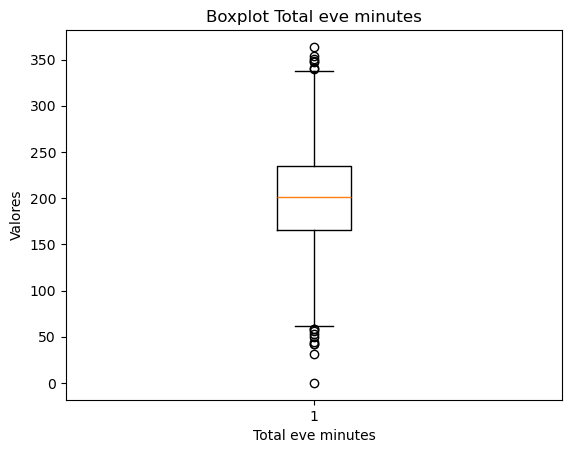

In [60]:
gerar_boxplot(clientes_contratos,'Total eve minutes','Boxplot Total eve minutes','Total eve minutes','Valores')

Total eve calls </br>
Número de ligações vespertinas. Variável quantitativa discreta.

In [61]:
clientes_contratos['Total eve calls']

0        99
1       103
2       110
3        88
4       122
       ... 
2661     68
2662    126
2663     55
2664     58
2665     82
Name: Total eve calls, Length: 2666, dtype: int64

In [62]:
clientes_contratos['Total eve calls'].describe()

count    2666.000000
mean      100.023631
std        20.161445
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total eve calls, dtype: float64

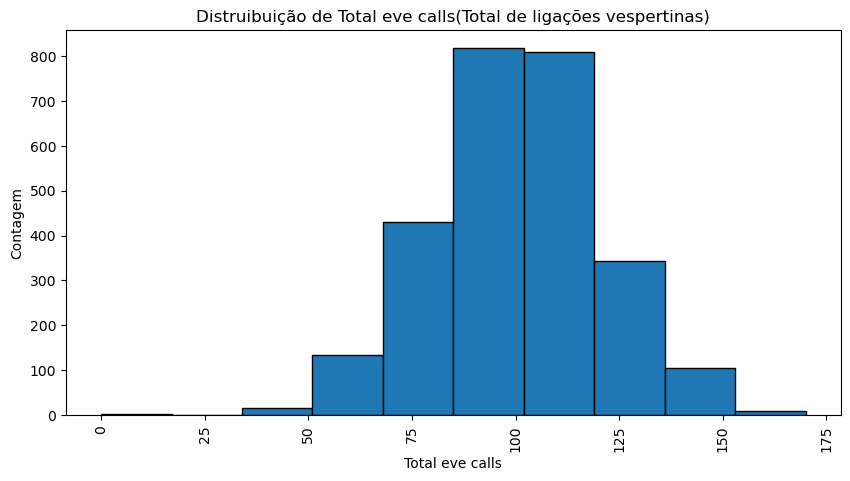

In [63]:
gerar_histograma(clientes_contratos,'Total eve calls',
                 'Distruibuição de Total eve calls(Total de ligações vespertinas)',
                 'Total eve calls',
                 'Contagem',True,False)

Em média, temos 200 de total de ligações noturnas.

Total eve charge </br>
Taxa total das ligações vespertinas. Variável quantitativa contínua.


In [64]:
clientes_contratos['Total eve charge'].head(5)

0    16.78
1    16.62
2    10.30
3     5.26
4    12.61
Name: Total eve charge, dtype: float64

In [65]:
clientes_contratos['Total eve charge'].describe()

count    2666.000000
mean       17.033072
std         4.330864
min         0.000000
25%        14.050000
50%        17.080000
75%        19.980000
max        30.910000
Name: Total eve charge, dtype: float64

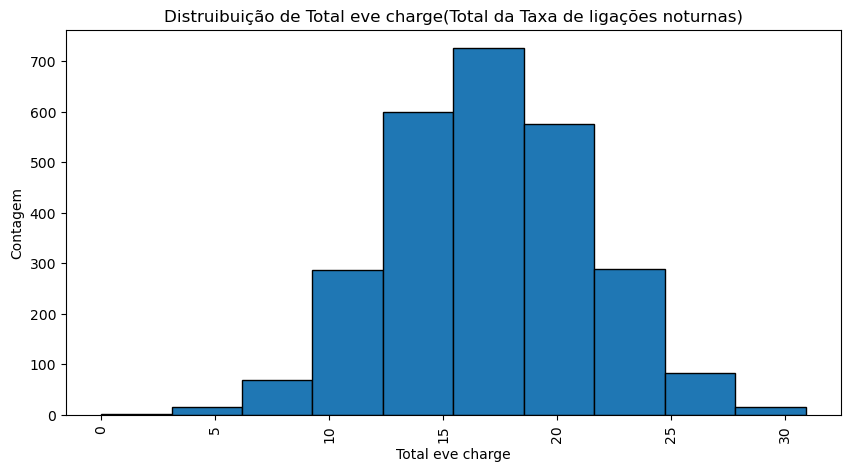

In [66]:
gerar_histograma(clientes_contratos,'Total eve charge',
                 'Distruibuição de Total eve charge(Total da Taxa de ligações noturnas)',
                 'Total eve charge',
                 'Contagem',True,False)

Em média, temos 17 de total de taxa de ligações noturnas.

In [67]:
clientes_contratos.columns
# Total eve calls

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Account_length_year'],
      dtype='object')

Total intl minutes </br>
Total de minutos em ligações. Variável quantitativa contínua.

Em média clientes possuem 10 minutos de ligações.

In [68]:
clientes_contratos['Total intl minutes'].describe()

count    2666.000000
mean       10.237022
std         2.788349
min         0.000000
25%         8.500000
50%        10.200000
75%        12.100000
max        20.000000
Name: Total intl minutes, dtype: float64

In [69]:
clientes_contratos['Total intl minutes'][0:10]

0    10.0
1    13.7
2    12.2
3     6.6
4    10.1
5     6.3
6     7.5
7     7.1
8    11.2
9     9.1
Name: Total intl minutes, dtype: float64

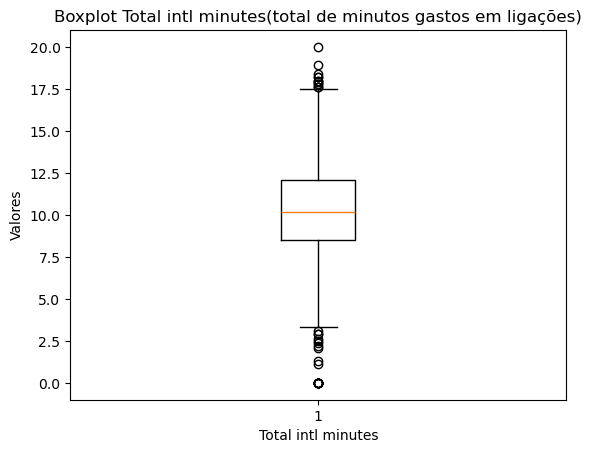

In [70]:
gerar_boxplot(clientes_contratos,'Total intl minutes','Boxplot Total intl minutes(total de minutos gastos em ligações)','Total intl minutes','Valores')

Total intl calls </br>
Total de chamadas. Variável quantitativa discreta.

In [71]:
clientes_contratos['Total intl calls'][0:10]

0    3
1    3
2    5
3    7
4    3
5    6
6    7
7    6
8    5
9    5
Name: Total intl calls, dtype: int64

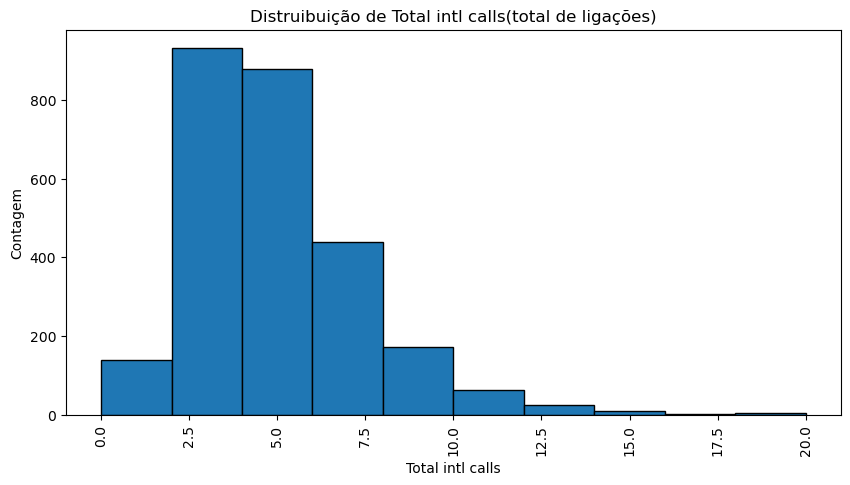

In [72]:
gerar_histograma(clientes_contratos,'Total intl calls',
                 'Distruibuição de Total intl calls(total de ligações)',
                 'Total intl calls',
                 'Contagem',True,False)

In [73]:
clientes_contratos['Total intl calls'].describe()

count    2666.000000
mean        4.467367
std         2.456195
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

Em média clientes 4 total de ligações.

Total intl charge </br>
Total de custos gastos em ligações. Variável quantitativa contínua.

In [74]:
clientes_contratos['Total intl charge']

0       2.70
1       3.70
2       3.29
3       1.78
4       2.73
        ... 
2661    3.19
2662    2.67
2663    2.59
2664    3.81
2665    3.70
Name: Total intl charge, Length: 2666, dtype: float64

In [75]:
gerar_histograma(clientes_contratos,'Total intl calls',
                 'Distruibuição de Total intl calls(total de ligações)',
                 'Total intl calls',
                 'Contagem',True,False)

Total night minutes </br>
Total de minutos gastos em ligações noturnas. Variável quantitativa contínua.

In [ ]:
clientes_contratos['Total night minutes'][0:5]

0    244.7
1    254.4
2    162.6
3    196.9
4    186.9
Name: Total night minutes, dtype: float64

In [ ]:
clientes_contratos['Total night minutes'].describe()

count    2666.000000
mean      201.168942
std        50.780323
min        43.700000
25%       166.925000
50%       201.150000
75%       236.475000
max       395.000000
Name: Total night minutes, dtype: float64

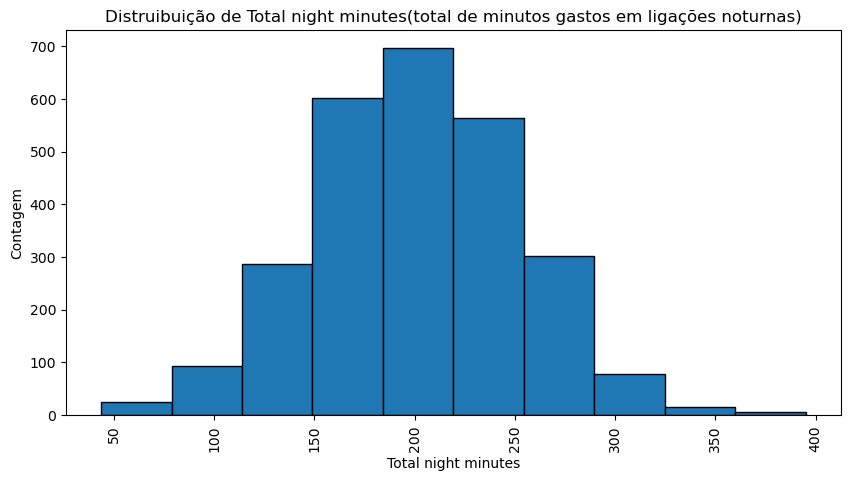

In [ ]:
gerar_histograma(clientes_contratos,'Total night minutes',
                 'Distruibuição de Total night minutes(total de minutos gastos em ligações noturnas)',
                 'Total night minutes',
                 'Contagem',True,False)

Total night calls </br>
Total de ligações noturnas. Variável quantitativa discreta.

In [ ]:
clientes_contratos['Total night calls']

0        91
1       103
2       104
3        89
4       121
       ... 
2661    128
2662     83
2663    123
2664     91
2665     77
Name: Total night calls, Length: 2666, dtype: int64

In [ ]:
clientes_contratos['Total night calls'].describe()

count    2666.000000
mean      100.106152
std        19.418459
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       166.000000
Name: Total night calls, dtype: float64

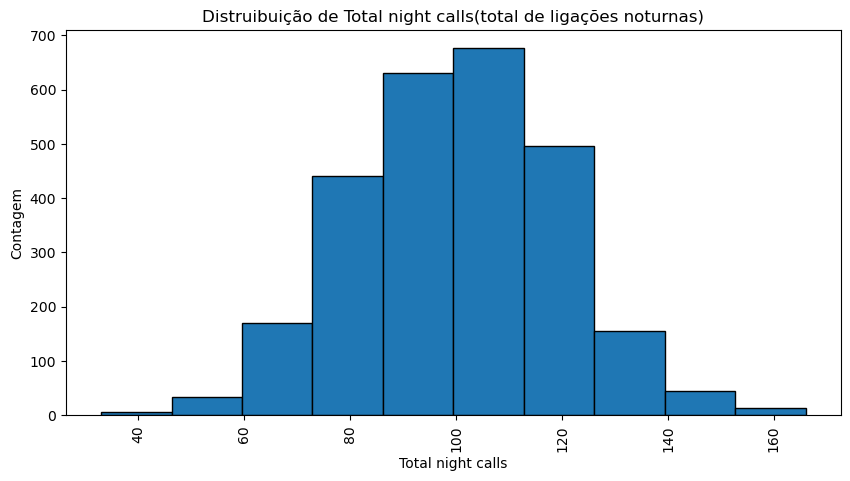

In [ ]:
gerar_histograma(clientes_contratos,'Total night calls',
                 'Distruibuição de Total night calls(total de ligações noturnas)',
                 'Total night calls',
                 'Contagem',True,False)

In [ ]:
clientes_contratos.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Account_length_year'],
      dtype='object')

Total night charge</br>
Total dos custos das ligações noturnas. Variável quantitativa contínua.

In [ ]:
clientes_contratos['Total night charge']

0       11.01
1       11.45
2        7.32
3        8.86
4        8.41
        ...  
2661     9.96
2662    12.56
2663     8.61
2664     8.64
2665    10.86
Name: Total night charge, Length: 2666, dtype: float64

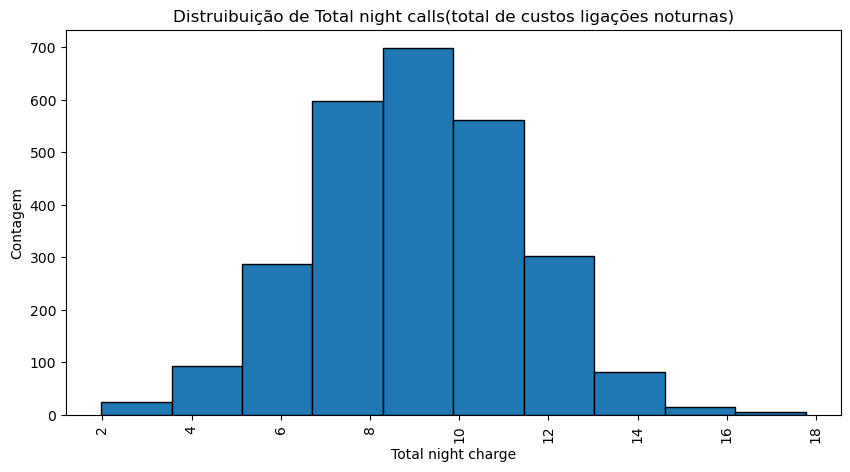

In [ ]:
gerar_histograma(clientes_contratos,'Total night charge',
                 'Distruibuição de Total night calls(total de custos ligações noturnas)',
                 'Total night charge',
                 'Contagem',True,False)

Customer service calls </br>
Total das chamadas ao call center (atendimento ao cliente). Variável quantitativa discreta.

In [ ]:
clientes_contratos['Customer service calls'].head(5)

0    1
1    1
2    0
3    2
4    3
Name: Customer service calls, dtype: int64

In [ ]:
clientes_contratos['Customer service calls'].describe()

count    2666.000000
mean        1.562641
std         1.311236
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

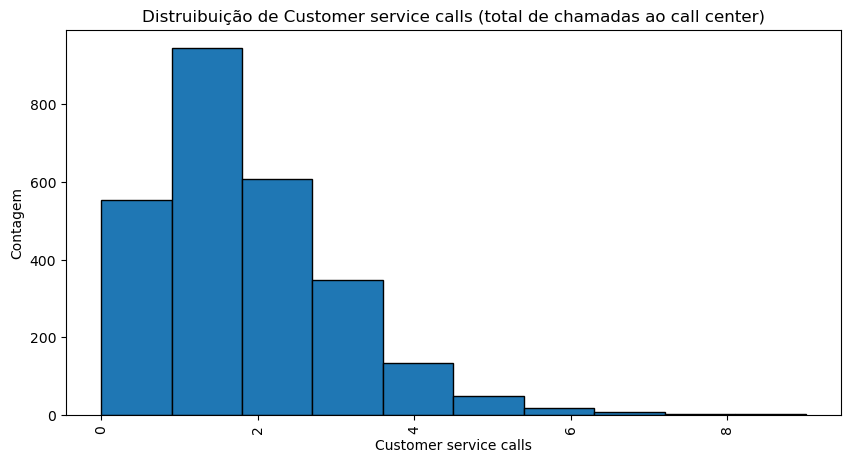

In [ ]:
gerar_histograma(clientes_contratos,'Customer service calls',
                 'Distruibuição de Customer service calls (total de chamadas ao call center)',
                 'Customer service calls',
                 'Contagem',True,False)

Análise de correlação entre as variáveis.  </br>
Custo, total de ligações, total de minutos gastos em ligações

In [ ]:
# Será que há correlação entre o total de minutos gastos e o custo?
clientes_contratos[['Total night minutes','Total night charge']].corr()

,Total night minutes,Total night charge
Total night minutes,1.000000,0.999999
Total night charge,0.999999,1.000000


In [ ]:
# Será que há correlação entre o total de ligações gastos e o custo?
# Certamente acontece para outras variáveis, escolheremos APENAS um DELAS.
clientes_contratos[['Total night calls','Total night charge']].corr()

,Total night calls,Total night charge
Total night calls,1.00000,0.01272
Total night charge,0.01272,1.00000


In [ ]:
clientes_contratos.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Account_length_year'],
      dtype='object')

In [ ]:
clientes_contratos[['Total day minutes','Total day calls','Total day charge']].corr()

,Total day minutes,Total day calls,Total day charge
Total day minutes,1.00000,0.016780,1.000000
Total day calls,0.01678,1.000000,0.016787
Total day charge,1.00000,0.016787,1.000000


Text(0.5, 1.0, 'Análise de correlação')

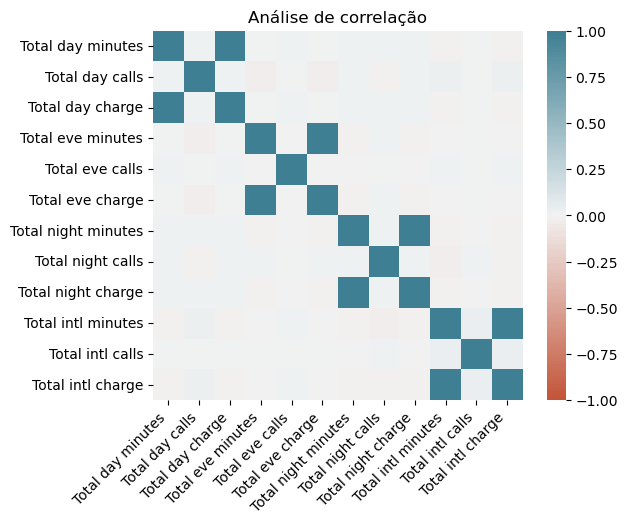

In [ ]:
corr = clientes_contratos[['Total day minutes','Total day calls','Total day charge',
                          'Total eve minutes','Total eve calls','Total eve charge',
                          'Total night minutes','Total night calls','Total night charge',
                          'Total intl minutes','Total intl calls','Total intl charge']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Análise de correlação')

In [ ]:
# Impressão dos valores das correlações
corr

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Total day minutes,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934
Total day calls,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133
Total day charge,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938
Total eve minutes,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947
Total eve calls,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000
Total eve charge,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955
Total night minutes,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510
Total night calls,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434
Total night charge,0.013464,0.008972,0.013468,-0.013450,-0.000135,-0.013464,0.999999,0.012720,1.000000,-0.008615,-0.001099,-0.008517
Total intl minutes,-0.011042,0.031036,-0.011046,-0.006915,0.011012,-0.006923,-0.008607,-0.023447,-0.008615,1.000000,0.037315,0.999993


In [ ]:
# Para modelagem, vamos selecionar algumas variáveis, escolhendo CUSTO ou TOTAL DE MINUTOS GASTOS EM LIGAÇÕES, provavelmente CUSTO, o que FAZ MAIS SENTIDO DO PONTO DE VISTA NEGOCIAL.
# Salvando a base de dados ABT

In [ ]:
clientes_contratos_abt = clientes_contratos[['State', 'Account_length_year', 'Area code', 'International plan','Voice mail plan', 'Number vmail messages',
                    'Total day charge','Total eve charge','Total night charge','Total intl charge',
                    'Customer service calls','Churn']]
print(f"Qtde de FEATURES + TARGET: {len(clientes_contratos_abt.columns)}")

Qtde de FEATURES + TARGET: 12


In [ ]:
clientes_contratos_abt.to_csv("../../bases/abt_contratos_clientes.csv",index=False)
print("Base ABT salva com sucesso")

Base ABT salva com sucesso


In [ ]:
clientes_contratos_abt.shape

(2666, 12)